## Import Library

In [1]:
import pandas as pd
import numpy as np

# seaborn可视化
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="notebook", style="darkgrid", 
        palette="deep", font="sans-serif", 
        font_scale=1, color_codes=True)

# 忽略警告
import warnings
warnings.filterwarnings("ignore")

## Read the Data

In [2]:
data = pd.read_csv("london_merged.csv")
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
# data number
data.shape

(17414, 10)

In [5]:
# data type
data.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [7]:
# check if there are any missing data:
data.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### Meaning of the data:

1. timestamp
2. cnt: new bike info
3. t1: real tempreature in C
4. t2: feeling tempreature
5. hum: 湿度
6. windspeed:
7. weaturecord 

## EDA

In [8]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 2.5 MB


In [10]:
# convert timestamp into datatime64 type
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [11]:
data.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [12]:
# change the index to timestamp
data = data.set_index("timestamp")
data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [13]:
# 3. get the hour, date, week, and month
data["hour"] = data.index.hour
data["day_of_month"] = data.index.day
data["day_of_week"] = data.index.dayofweek
data["month"] = data.index.month


In [14]:
data.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'hour', 'day_of_month', 'day_of_week', 'month'],
      dtype='object')

In [15]:
data.shape

(17414, 13)

## Correlation coefficient to find the absolute value

In [16]:
corr_matrix = data.corr().abs()
corr_matrix

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
cnt,1.000000,0.388798,0.369035,0.462901,0.116295,0.166633,0.051698,0.096499,0.116180,0.324423,0.017887,0.068688,0.063757
t1,0.388798,1.000000,0.988344,0.447781,0.145471,0.097114,0.042233,0.005342,0.285851,0.168708,0.005072,0.002317,0.332712
t2,0.369035,0.988344,1.000000,0.403495,0.088409,0.098385,0.040051,0.008510,0.285900,0.153956,0.006791,0.006824,0.368366
hum,0.462901,0.447781,0.403495,1.000000,0.287789,0.334750,0.032068,0.028098,0.290381,0.295653,0.020868,0.011556,0.113149
wind_speed,0.116295,0.145471,0.088409,0.287789,1.000000,0.124803,0.002606,0.011479,0.010305,0.141792,0.002040,0.001708,0.086383
weather_code,0.166633,0.097114,0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,0.041786,0.001904,0.020619,0.033253
is_holiday,0.051698,0.042233,0.040051,0.032068,0.002606,0.012939,1.000000,0.094898,0.032488,0.000288,0.042657,0.144628,0.011511
is_weekend,0.096499,0.005342,0.008510,0.028098,0.011479,0.042362,0.094898,1.000000,0.001067,0.001803,0.005721,0.791975,0.005406
season,0.116180,0.285851,0.285900,0.290381,0.010305,0.098976,0.032488,0.001067,1.000000,0.000006,0.006460,0.002356,0.203249
hour,0.324423,0.168708,0.153956,0.295653,0.141792,0.041786,0.000288,0.001803,0.000006,1.000000,0.000310,0.001834,0.000312


In [17]:
# if the correlation between two variables is greater than 0.8. 
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

high_corr_var

[('t1', 't2')]

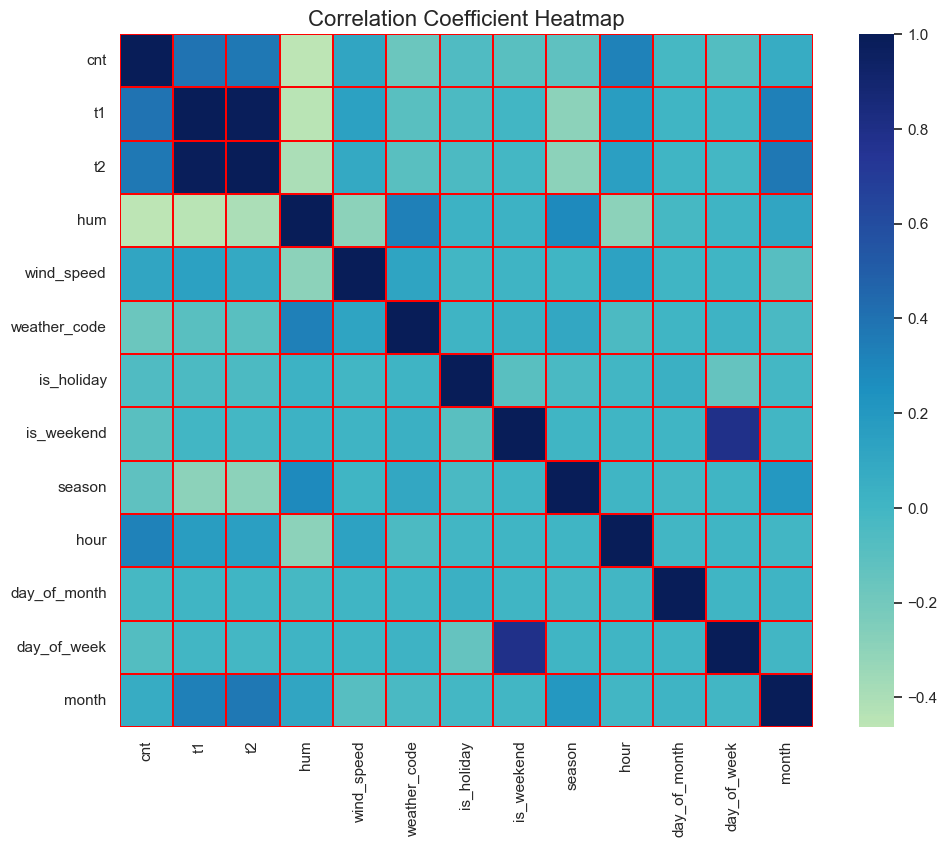

In [20]:
## Correlation coefficient heat map
plt.figure(figsize=(12, 9))

sns.heatmap(data.corr(),
            cmap="YlGnBu",  # 色系
            square=True,  # 方形
            linewidths=.2,
            center=0,
            linecolor="red"  # 线条颜色
           )

plt.title('Correlation Coefficient Heatmap', fontsize=16)
plt.show()

### quantity demanded

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

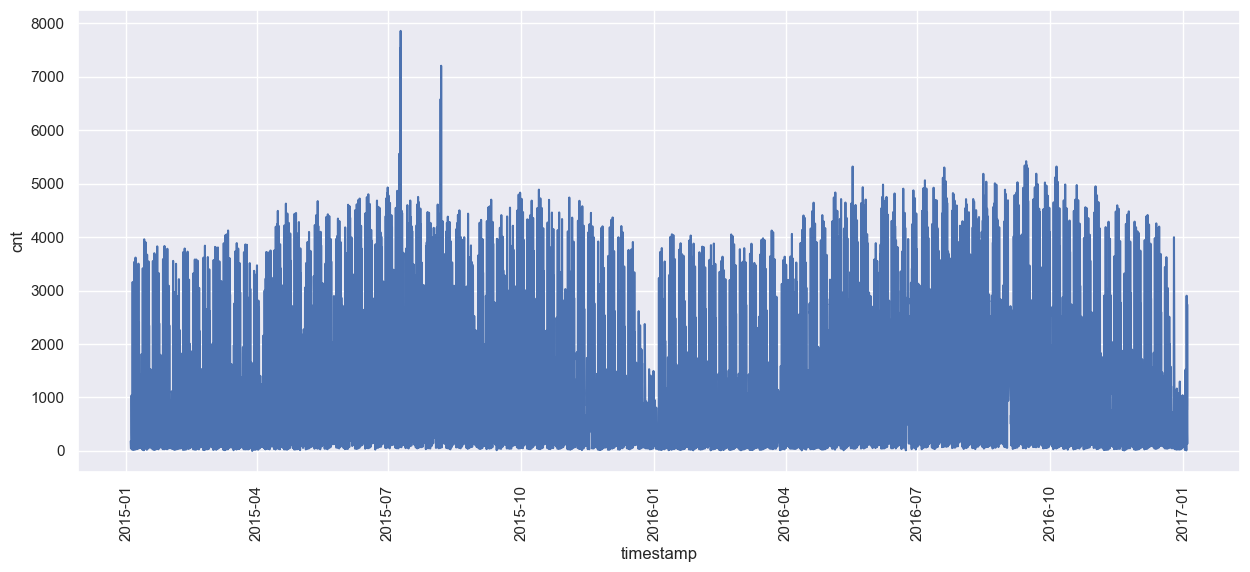

In [21]:
plt.figure(figsize=(15,6))

sns.lineplot(data=data,  # 传入数据
             x=data.index,  # 时间
             y=data.cnt  # 需求量
            )

plt.xticks(rotation=90)

### Resample per month

In [24]:
df_by_month = data.resample("M").sum()
df_by_month.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-31,546639,4101.0,2255.5,51005.00,12502.00,2211.0,0.0,192.0,2013.0,7709,11753,2014,671
2015-02-28,543594,3721.5,1868.0,51950.00,9873.50,2409.0,0.0,192.0,2013.0,7707,9734,2015,1342
2015-03-31,695934,6093.5,4558.5,51832.25,12938.25,1940.0,0.0,215.0,0.0,8540,11751,2174,2217
2015-04-30,831582,7873.0,7112.5,48468.00,10988.50,1642.0,48.0,191.0,0.0,8270,11156,2131,2876
2015-05-31,895413,10091.5,9803.5,47939.00,14268.50,1900.0,48.0,240.0,0.0,8556,11904,2376,3720


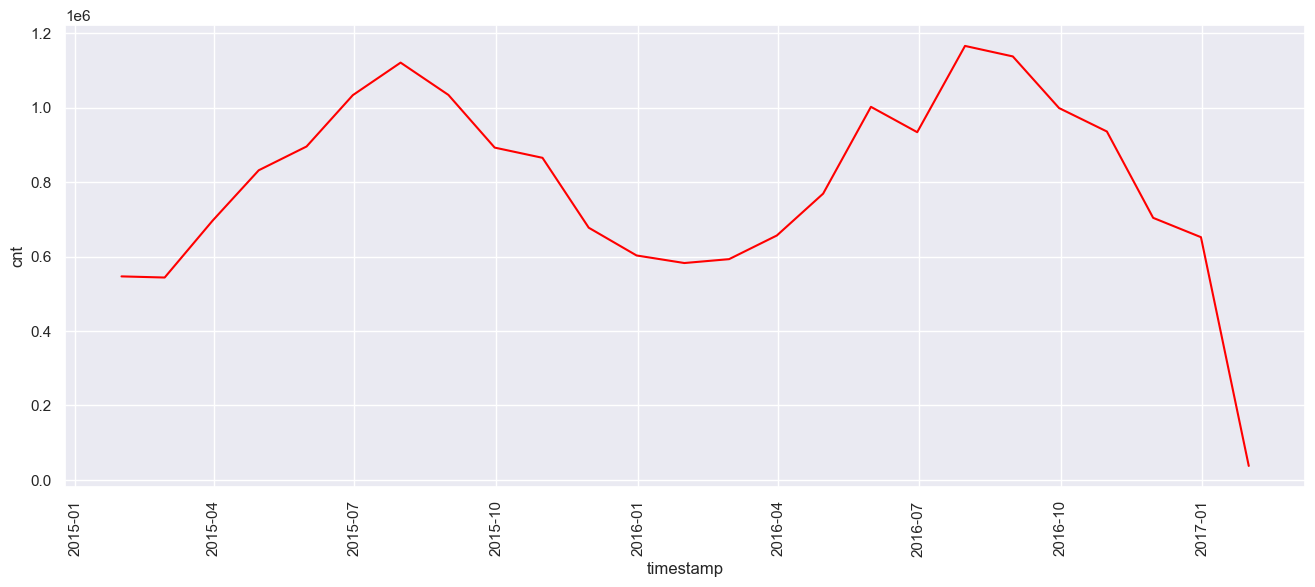

: 

In [ ]:
plt.figure(figsize=(16,6))

sns.lineplot(data=df_by_month,
             x=df_by_month.index,
             y=df_by_month.cnt,
             color="red"
            )

plt.xticks(rotation=90)

plt.show()